## Select the dataset : Quality and process data to predict the quality of the heat treatment process

### 패키지 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns

### 데이터 로드

In [2]:
data = pd.read_csv('/home/user/Desktop/bsh/absoluteA/data/data.csv',encoding = 'cp949')
quality = pd.read_excel('/home/user/Desktop/bsh/absoluteA/data/quality.xlsx')

# 데이터셋 구성 및 shape 확인

In [3]:
data.head(5)

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
0,2022-01-03 11:22:07,102410,75.6648,30.0155,NaN,NaN,68.4386,72.84030,59.7862,51.71690,...,0.450421,NaN,NaN,859.854,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-03 11:22:08,102410,75.6706,32.2732,NaN,NaN,68.4386,78.44150,61.6286,50.44530,...,0.450356,1.146260e-10,860.338,859.780,860.044,859.786,294.658,272.538,328.734,328.865
2,2022-01-03 11:22:09,102410,75.6776,32.1592,98.8533,99.14600,68.4386,78.10990,61.5414,52.01960,...,0.450341,1.145200e-10,860.338,859.780,859.981,859.724,294.658,272.538,328.734,328.805
3,2022-01-03 11:22:11,102410,75.8656,30.8312,98.7918,99.17675,68.4999,77.50725,60.6663,52.69425,...,0.450201,1.144670e-10,860.338,859.842,859.950,859.599,294.719,272.538,328.674,328.865
4,2022-01-03 11:22:12,102410,73.6468,29.5274,98.7918,99.20750,68.4386,76.02620,61.1634,51.69150,...,0.450235,1.145360e-10,860.351,859.791,859.991,859.731,294.721,272.599,328.740,328.808


In [4]:
quality.head(5)

,배정번호,작업일,공정명,설비명,양품수량,불량수량,총수량
0,102410,2022-01-03,열처리,열처리 염욕_1,15160,3,15163
1,102585,2022-01-03,열처리,열처리 염욕_1,29892,10,29902
2,102930,2022-01-04,열처리,열처리 염욕_1,59616,30,59646
3,103142,2022-01-05,열처리,열처리 염욕_1,74730,13,74743
4,103675,2022-01-06,열처리,열처리 염욕_1,14979,2,14981


In [5]:
data.shape

(2939722, 21)

In [6]:
quality.shape

(136, 7)

## Data shape 
### data : record 2939722, feature 21, total data count 61,734,162 
### quality : record 136, feature 7, total data count 952 


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2939722 entries, 0 to 2939721
Data columns (total 21 columns):
 #   Column             Dtype  
---  ------             -----  
 0   TAG_MIN            object 
 1   배정번호               int64  
 2   건조 1존 OP           float64
 3   건조 2존 OP           float64
 4   건조로 온도 1 Zone      float64
 5   건조로 온도 2 Zone      float64
 6   세정기                float64
 7   소입1존 OP            float64
 8   소입2존 OP            float64
 9   소입3존 OP            float64
 10  소입4존 OP            float64
 11  소입로 CP 값           float64
 12  소입로 CP 모니터 값       float64
 13  소입로 온도 1 Zone      float64
 14  소입로 온도 2 Zone      float64
 15  소입로 온도 3 Zone      float64
 16  소입로 온도 4 Zone      float64
 17  솔트 컨베이어 온도 1 Zone  float64
 18  솔트 컨베이어 온도 2 Zone  float64
 19  솔트조 온도 1 Zone      float64
 20  솔트조 온도 2 Zone      float64
dtypes: float64(19), int64(1), object(1)
memory usage: 471.0+ MB


In [8]:
# 문자열 형식을 날짜 형식으로 변환
data['TAG_MIN'] =pd.to_datetime(data.TAG_MIN, format='%Y-%m-%d %H:%M:%S')

In [9]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   배정번호    136 non-null    int64         
 1   작업일     136 non-null    datetime64[ns]
 2   공정명     136 non-null    object        
 3   설비명     136 non-null    object        
 4   양품수량    136 non-null    int64         
 5   불량수량    136 non-null    int64         
 6   총수량     136 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 7.6+ KB


In [10]:
# 데이터파일 통계값 확인
data.describe()

,TAG_MIN,배정번호,건조 1존 OP,건조 2존 OP,건조로 온도 1 Zone,건조로 온도 2 Zone,세정기,소입1존 OP,소입2존 OP,소입3존 OP,...,소입로 CP 값,소입로 CP 모니터 값,소입로 온도 1 Zone,소입로 온도 2 Zone,소입로 온도 3 Zone,소입로 온도 4 Zone,솔트 컨베이어 온도 1 Zone,솔트 컨베이어 온도 2 Zone,솔트조 온도 1 Zone,솔트조 온도 2 Zone
count,2939722,2.939722e+06,2.939721e+06,2.939721e+06,2.939606e+06,2.939574e+06,2.939631e+06,2.935434e+06,2.939722e+06,2.939720e+06,...,2.939721e+06,2.939575e+06,2.939592e+06,2.939594e+06,2.939565e+06,2.939552e+06,2.939616e+06,2.939580e+06,2.939513e+06,2.939519e+06
mean,2022-04-20 13:31:35.956592640,1.284422e+05,6.989404e+01,2.044708e+01,1.000061e+02,1.000198e+02,6.771864e+01,7.564373e+01,5.486239e+01,5.386029e+01,...,4.488618e-01,1.145580e-10,8.592077e+02,8.600021e+02,8.600029e+02,8.600062e+02,2.839963e+02,2.799293e+02,3.318062e+02,3.321773e+02
min,2022-01-03 11:22:07,1.024100e+05,4.725320e+01,1.188830e-04,9.734210e+01,9.787060e+01,6.062440e+01,8.500550e-04,8.620010e+00,4.370450e-02,...,5.096370e-03,1.116620e-10,8.402980e+02,8.559290e+02,8.582800e+02,8.579920e+02,2.662300e+02,2.664260e+02,3.281610e+02,3.280730e+02
25%,2022-03-12 01:18:09.249999872,1.194480e+05,6.842880e+01,1.891760e+01,9.981440e+01,9.989010e+01,6.656940e+01,6.496270e+01,5.332590e+01,5.238910e+01,...,4.484415e-01,1.142615e-10,8.579490e+02,8.597760e+02,8.598290e+02,8.598430e+02,2.747540e+02,2.735020e+02,3.318670e+02,3.321780e+02
50%,2022-04-22 15:20:36.500000,1.298890e+05,7.051660e+01,2.129310e+01,1.000020e+02,1.000190e+02,6.769720e+01,8.221040e+01,5.566540e+01,5.388620e+01,...,4.500620e-01,1.145550e-10,8.595750e+02,8.600220e+02,8.600020e+02,8.600000e+02,2.845860e+02,2.800200e+02,3.320170e+02,3.324230e+02
75%,2022-06-06 01:11:17.750000128,1.391160e+05,7.237810e+01,2.338840e+01,1.001910e+02,1.001610e+02,6.897990e+01,9.536660e+01,5.757330e+01,5.541450e+01,...,4.517070e-01,1.148440e-10,8.602580e+02,8.602490e+02,8.601720e+02,8.601580e+02,2.933430e+02,2.863340e+02,3.321410e+02,3.326260e+02
max,2022-07-19 19:08:59,1.480690e+05,8.729950e+01,4.753950e+01,1.024690e+02,1.018430e+02,7.149010e+01,1.000000e+02,7.727090e+01,6.601500e+01,...,9.091110e-01,1.329290e-10,8.772280e+02,8.660340e+02,8.701190e+02,8.821480e+02,2.985300e+02,2.916960e+02,3.327170e+02,3.331790e+02
std,NaN,1.263704e+04,4.014802e+00,5.217123e+00,4.360371e-01,3.623526e-01,1.630768e+00,2.516083e+01,4.429079e+00,2.664304e+00,...,1.886477e-02,6.012797e-13,3.647667e+00,5.578480e-01,3.518205e-01,4.551778e-01,9.512770e+00,6.611579e+00,7.827379e-01,8.732977e-01


In [11]:
# 불량률 파일 통계값 확인
quality.describe()

,배정번호,작업일,양품수량,불량수량,총수량
count,136.000000,136,136.000000,136.000000,136.000000
mean,128897.191176,2022-04-21 10:35:17.647058944,45012.301471,15.117647,45027.419118
min,102410.000000,2022-01-03 00:00:00,8412.000000,0.000000,8414.000000
25%,120467.750000,2022-03-15 18:00:00,29736.000000,4.000000,29755.000000
50%,130199.000000,2022-04-23 00:00:00,44003.000000,8.500000,44020.500000
75%,138982.500000,2022-06-03 12:00:00,60120.750000,17.000000,60135.500000
max,148069.000000,2022-07-19 00:00:00,104740.000000,120.000000,104761.000000
std,12403.393924,NaN,25548.197992,18.549657,25554.548710


# Data Exploration

In [12]:
# 시각화에 이용될 폰트와 폰트 크기
plt.rcParams['font.size'] = 13
plt.rcParams['font.family'] ='NanumGothicCoding'
matplotlib.rcParams['axes.unicode_minus'] =False

Text(0.5, 1.0, '초(sec)당 생산량')

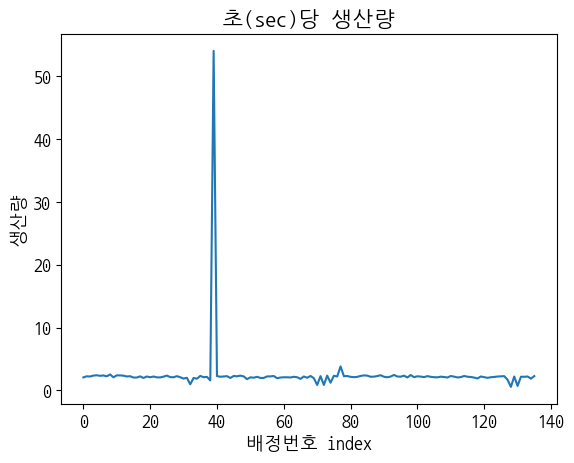

In [13]:
minute = data["배정번호"].value_counts().reset_index()
minute.columns = ["배정번호", "초"]
merged_df = pd.merge(quality, minute, on="배정번호", how="left")
merged_df['초당생산량'] = merged_df['총수량']/merged_df['초']
merged_df['초당생산량'].plot()
plt.ylabel('생산량')
plt.xlabel('배정번호 index')
plt.title('초(sec)당 생산량')

## 불량개수 및 불량률 분포 시각화

In [14]:
quality['불량률'] = quality['불량수량'] / quality['총수량']
print(quality['불량률'].describe())

count    136.000000
mean       0.000370
std        0.000482
min        0.000000
25%        0.000127
50%        0.000220
75%        0.000456
max        0.003685
Name: 불량률, dtype: float64


In [15]:
quality[['양품수량','불량수량']].sum(axis=0)

양품수량    6121673
불량수량       2056
dtype: int64

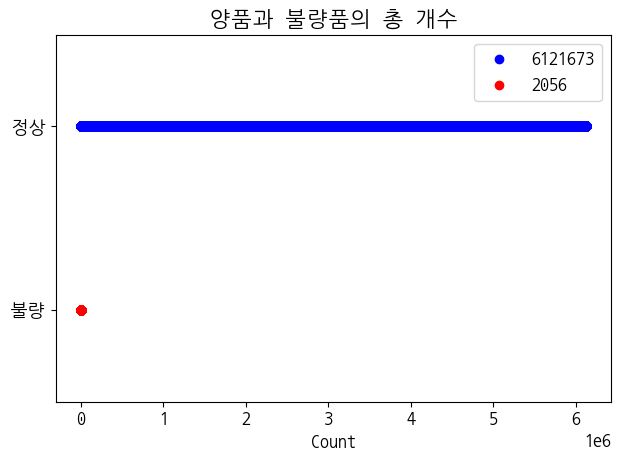

In [16]:
# 불량과 정상의 수량 데이터
categories = ['불량', '정상']
values = [2056, 6121673]  # 예시 값
colors = ['red', 'blue']  # 색상 설정

# 도트 플롯 생성
fig, ax = plt.subplots()
y_positions = [0.2, 0.4]  # y축의 위치를 조절하여 간격 줄임


index, value = 1, 6121673
ax.scatter(np.arange(value), [y_positions[index]] * value, color=colors[index], label=value)
index, value = 0, 2056
ax.scatter(np.arange(value), [y_positions[index]] * value, color=colors[index], label=value)

ax.set_xlabel('Count')
ax.set_ylim(0.1, 0.5)  # y축의 범위 설정
ax.set_yticks(y_positions)
ax.set_yticklabels(categories)
ax.set_title('양품과 불량품의 총 개수')
plt.legend()
plt.tight_layout()
plt.show()

## 결측치 시각화

Text(0.5, 1.0, '변수 별 결측치 수')

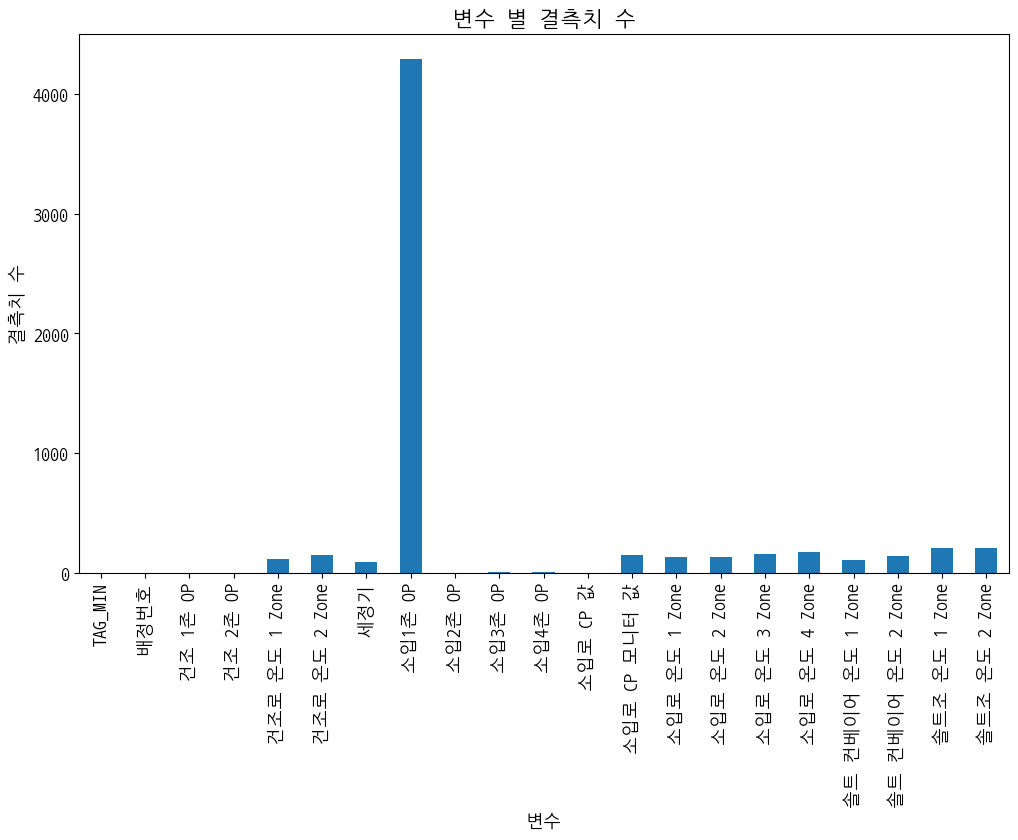

In [17]:
missing_data = data.isnull().sum()
missing_data.plot(kind='bar', figsize=(12,7))
plt.ylabel('결측치 수')
plt.xlabel('변수')
plt.title('변수 별 결측치 수')

## 변수들의 시간 흐름에 따른 시각화(예시)

/tmp/ipykernel_3671747/344894488.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_droped['TAG_MIN'] = pd.to_datetime(data_droped['TAG_MIN'])


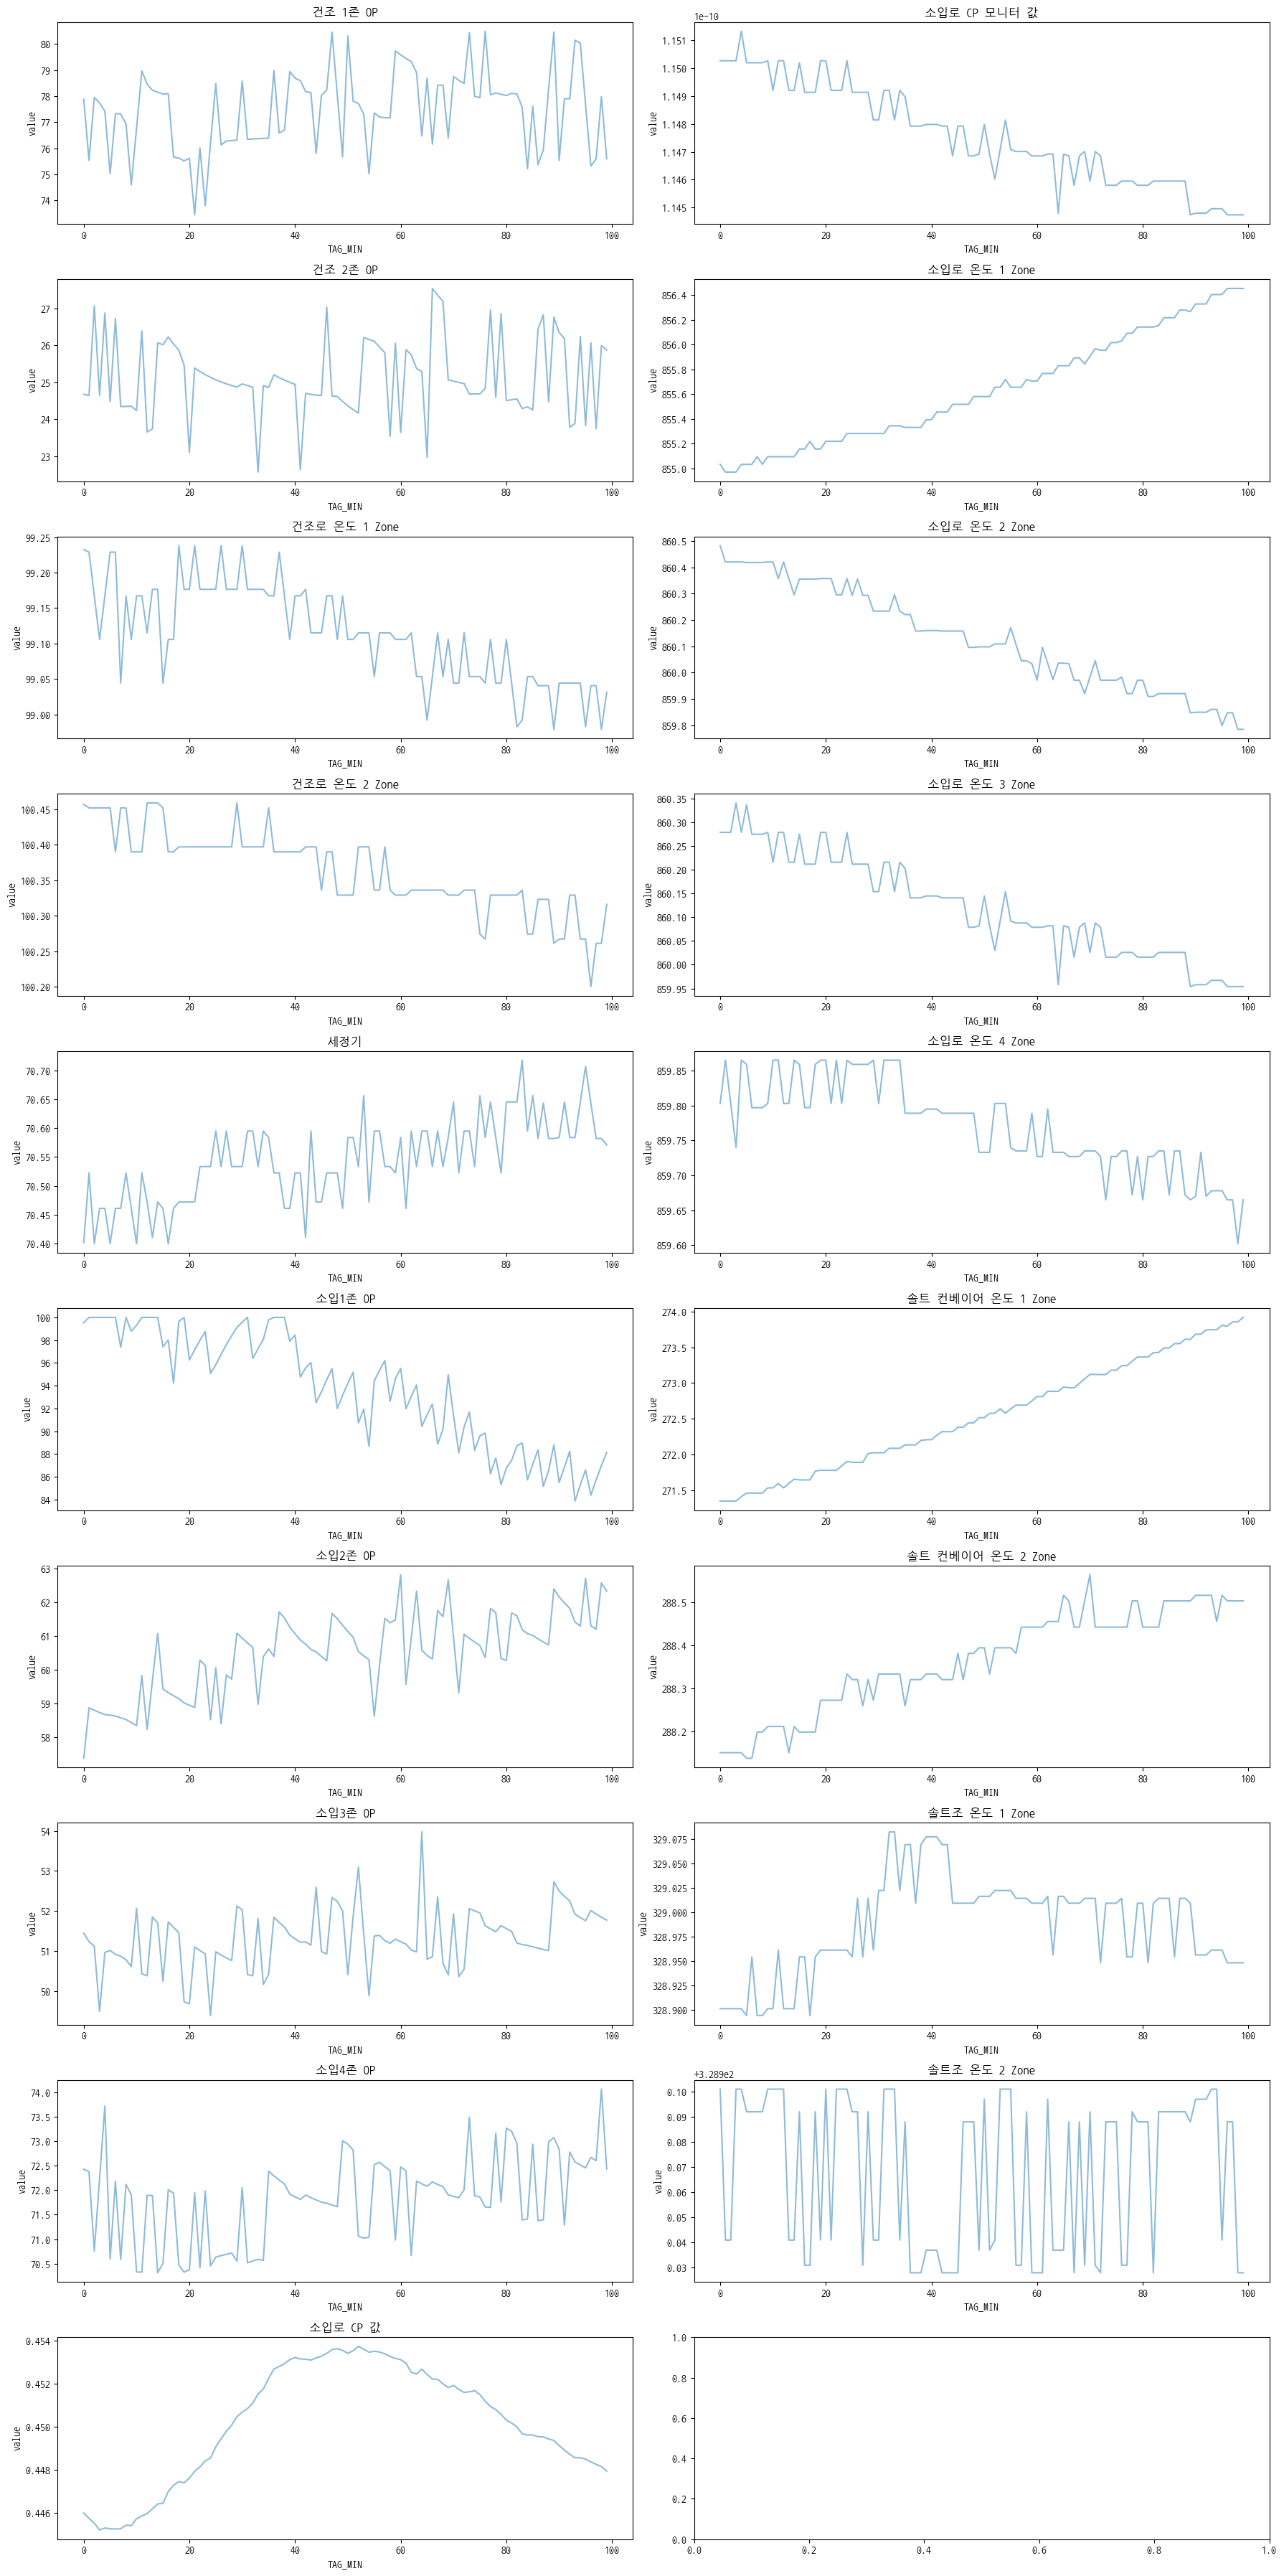

In [18]:
# 결측치가 없는 연속된 60초를 확인하기 위해 결측치 제거를 먼저 진행
data_droped = data.dropna()
# features

plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] ='NanumGothicCoding'
matplotlib.rcParams['axes.unicode_minus'] =False

features = data.columns.drop(['TAG_MIN', '배정번호'])

# EDA 시각화에는 예시 하나만 첨부
sequence_length = 100
data_droped.reset_index(drop=True, inplace=True)
data_droped['TAG_MIN'] = pd.to_datetime(data_droped['TAG_MIN'])
assign_num = data_droped['배정번호'].unique()[1]
sampled_labeled_df = data_droped[data_droped['배정번호']==assign_num]
sampled_labeled_df = sampled_labeled_df.reset_index(drop=True)
start_idx = 0
while start_idx + sequence_length <= len(sampled_labeled_df):
    end_idx = start_idx + sequence_length
    sub_df = sampled_labeled_df.iloc[start_idx:end_idx]
    time_diff = (sub_df['TAG_MIN'].max() - sub_df['TAG_MIN'].min()).seconds
    if time_diff == sequence_length - 1:
        sequence = sub_df.drop(columns=['TAG_MIN', '배정번호']).reset_index(drop=True)
        break
    else:
        start_idx += 1

fig, axes = plt.subplots(nrows=10, ncols = 2, figsize=(18,36), sharex=False)
i,j = 0, 0
for col in features:
    axes[i][j].plot(sequence.index, sequence[col], label='Seconds', alpha=0.5) # Plot the original data (seconds)
    axes[i][j].set_title(col)
    axes[i][j].set_xlabel('TAG_MIN')
    axes[i][j].set_ylabel('value')
    if i == 9:
        i = 0
        j += 1
    else:
        i+=1
    # Show the plot
plt.tight_layout()
plt.show()

## 변수들 사이 상관계수 시각화 : heatmap

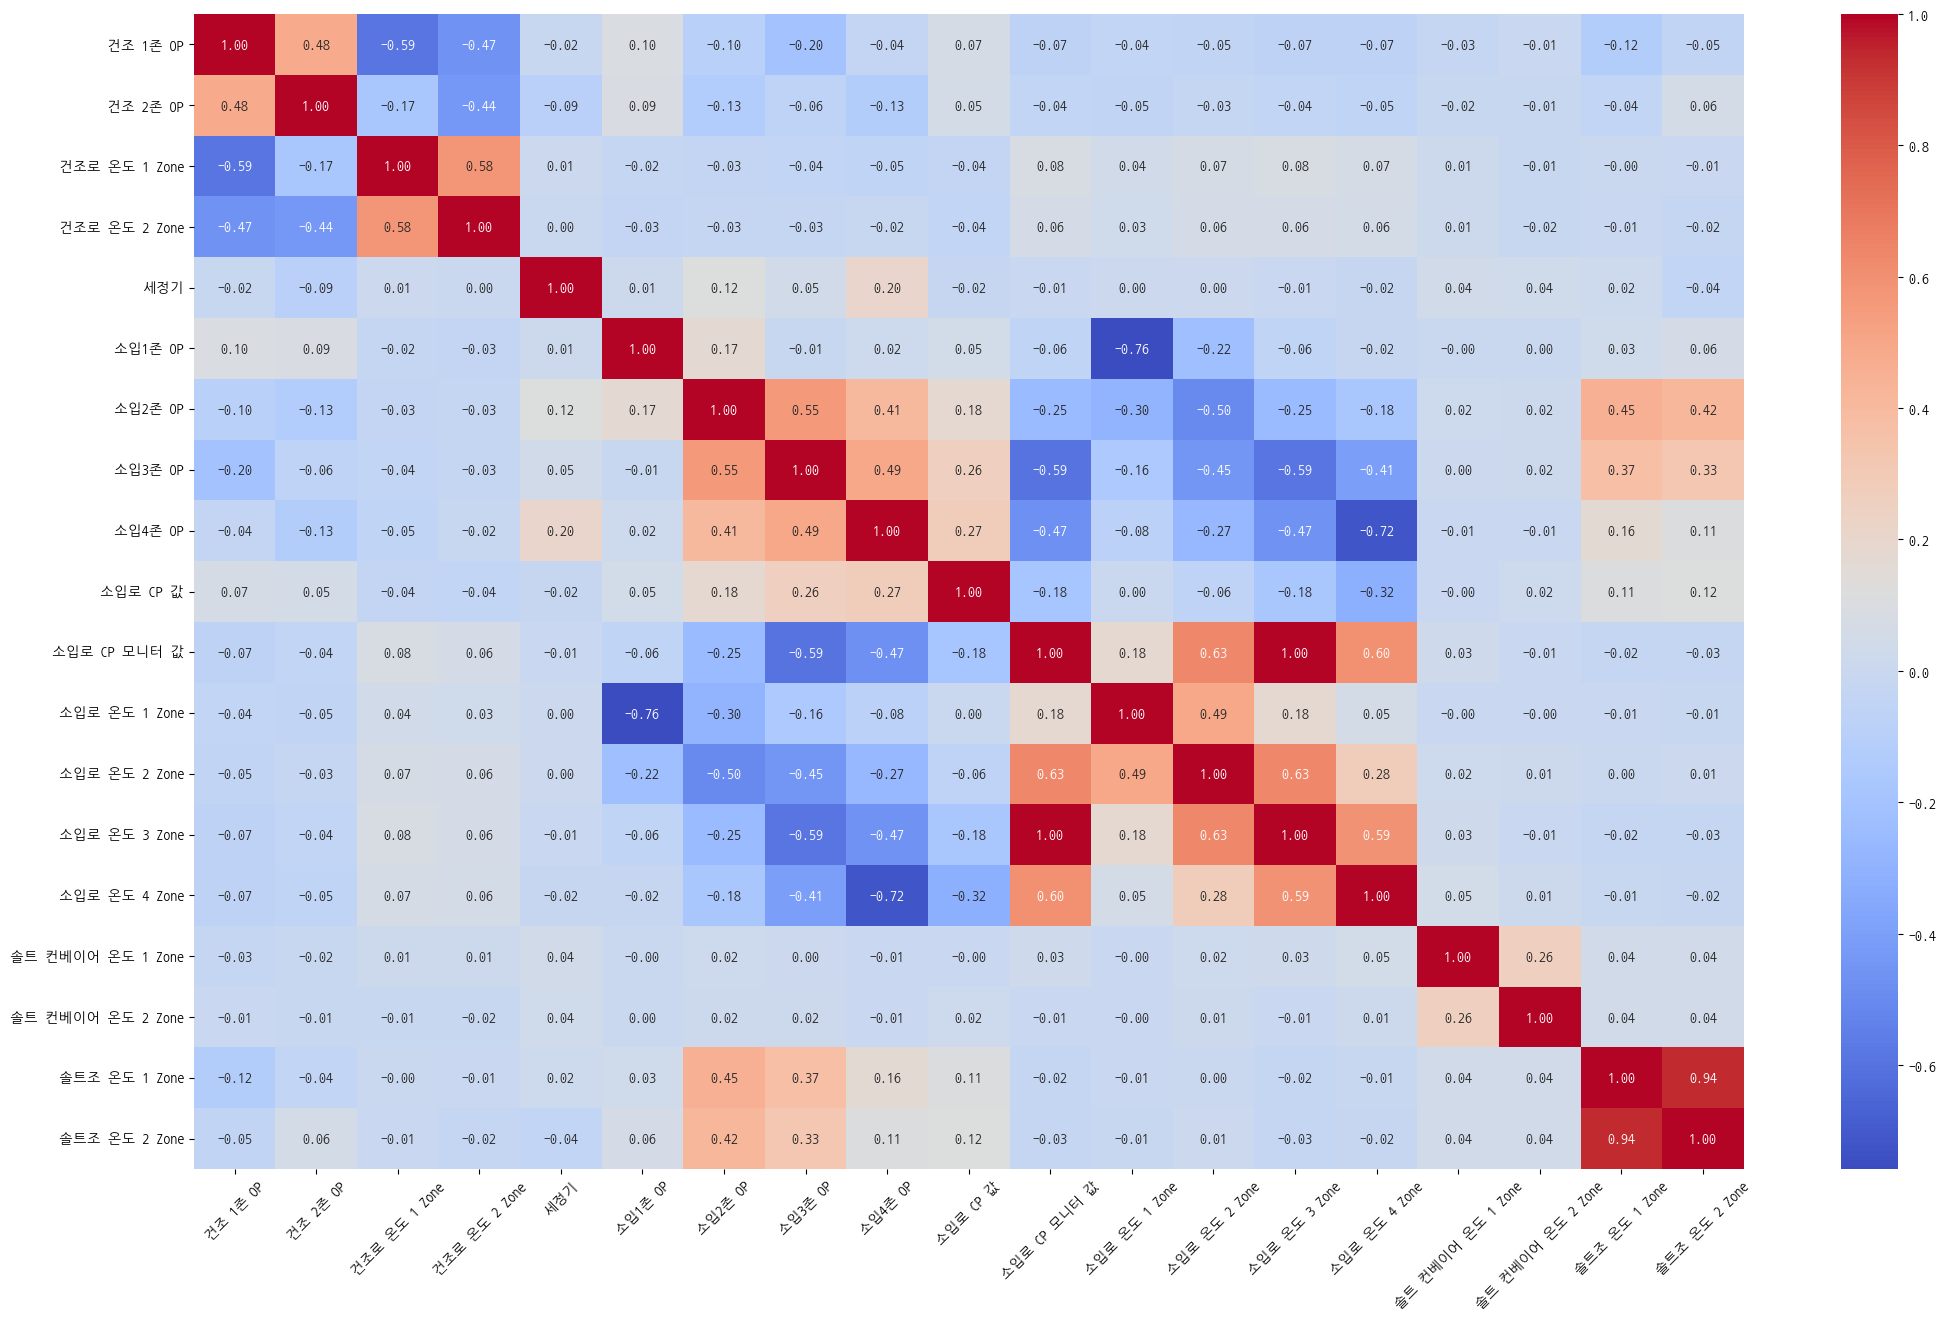

In [19]:
features = data.columns.drop(['TAG_MIN', '배정번호'])
plt.figure(figsize=(25,15))
target_cor = data.corr().loc[features, features]
sns.heatmap(target_cor, annot=True, fmt=".2f", cmap ='coolwarm')
plt.xticks(rotation=45)
plt.show()

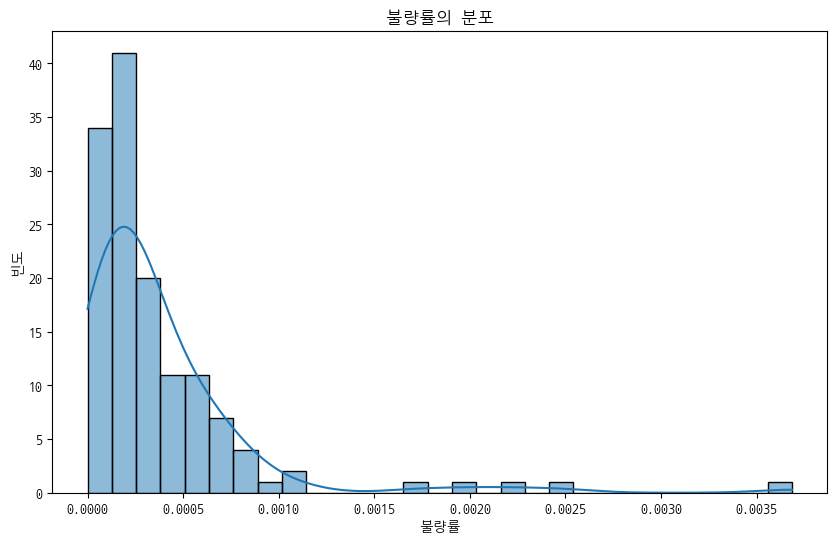

In [20]:
# histplot
plt.figure(figsize=(10, 6))
sns.histplot(quality['불량률'], kde=True)
plt.title("불량률의 분포")
plt.xlabel("불량률")
plt.ylabel("빈도")
plt.show()

## 데이터 품질 측정

## 1. 완전성

현재 학습에 사용된 데이터는 결측치를 모두 제거한 후 사용

In [37]:
threshold = 0.1
quality['불량률'] = quality['불량수량']/ quality['총수량'] * 100
quality['불량여부'] = quality['불량률'].apply(lambda x: 1 if x > threshold else 0)
train = data.merge(quality[['배정번호','불량여부']], on='배정번호', how='left')
train['TAG_MIN'] =pd.to_datetime(train.TAG_MIN, format='%Y-%m-%d %H:%M:%S')
train = train.dropna() # 지금은 결측치가 있는 행을 제거
print('결측치 개수 : ', train.isna().sum().sum())

결측치 개수 :  0


완전성을 충족함을 확인하였다.

# 2. 유일성

학습 데이터에 중복이 있는지 확인한다.

In [22]:
print('중복 데이터 개수 : ', train.duplicated().sum())

중복 데이터 개수 :  0


# 3. 유효성

In [38]:
train.describe().T

,count,mean,min,25%,50%,75%,max,std
TAG_MIN,2935045,2022-04-20 13:38:10.622449408,2022-01-03 11:22:09,2022-03-12 01:07:47,2022-04-22 15:30:31,2022-06-06 01:16:07,2022-07-19 19:08:59,NaN
배정번호,2935045.0,128442.982429,102410.0,119448.0,129889.0,139116.0,148069.0,12640.665011
건조 1존 OP,2935045.0,69.893235,47.2532,68.4293,70.5171,72.3776,87.2995,4.016107
건조 2존 OP,2935045.0,20.440534,0.000119,18.9149,21.2896,23.3827,47.5395,5.21615
건조로 온도 1 Zone,2935045.0,100.00624,97.3421,99.8146,100.002,100.191,102.469,0.435954
건조로 온도 2 Zone,2935045.0,100.020349,97.8706,99.8903,100.019,100.161,101.843,0.361287
세정기,2935045.0,67.719346,60.6244,66.5705,67.6978,68.98,71.4901,1.630345
소입1존 OP,2935045.0,75.643363,0.00085,64.9612,82.2102,95.36815,100.0,25.161569
소입2존 OP,2935045.0,54.860442,8.62001,53.3257,55.6648,57.5709,77.2709,4.427754
소입3존 OP,2935045.0,53.859311,0.043705,52.3886,53.8857,55.4134,66.015,2.66436


# 4. 일관성

In [33]:
train.dtypes

TAG_MIN              datetime64[ns]
배정번호                          int64
건조 1존 OP                    float64
건조 2존 OP                    float64
건조로 온도 1 Zone               float64
건조로 온도 2 Zone               float64
세정기                         float64
소입1존 OP                     float64
소입2존 OP                     float64
소입3존 OP                     float64
소입4존 OP                     float64
소입로 CP 값                    float64
소입로 CP 모니터 값                float64
소입로 온도 1 Zone               float64
소입로 온도 2 Zone               float64
소입로 온도 3 Zone               float64
소입로 온도 4 Zone               float64
솔트 컨베이어 온도 1 Zone           float64
솔트 컨베이어 온도 2 Zone           float64
솔트조 온도 1 Zone               float64
솔트조 온도 2 Zone               float64
불량여부                          int64
dtype: object